# Regressão 01 - tarefa 03 - transformações em X e Y

In [2]:
import pandas as pd

import seaborn as sns
from seaborn import load_dataset

import patsy
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [94]:
tips = sns.load_dataset('tips') #Carregando base de dados de gorjeta
tips['tip_pct'] = tips['tip'] / (tips['total_bill']-tips['tip']) #Criando coluna percentual
tips['net_bill'] = tips['total_bill'] - tips['tip'] #Criando coluna total liquido (total a pagar menos gorjeta)
tips.head() #Visualizando os dados

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [95]:
# Declarando a matriz de design do Patsy, onde tip é a dependente e as demais são as explicativas
# Obs: Foi utilizado time no lugar de diner, levando em conta que seria um erro de digitação
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

# Criando a regressão linear com o StatsModels ols e usando o y e X do dmatrices criado anteriormente
reg_patsy = smf.ols('y ~ X', data = tips).fit()
reg_patsy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.64e-20
Time:                        18:54:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6000      0.121      4.952      0.000       0.361       0.839
X[0]           0.6000      0.121      4.952      0.000       0.361       0.839
X[1]          -0.0034      0.156     -0.022      0.982      -0.311       0.305
X[2]           0.1405      0.151      0.932      0.352      -0.156       0.437
X[3]           0.0584      0.168      0.347      0.729      -0.273       0.390
X[4]           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                     9.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
'''
Como ficou um pouco ruim fazer analise onde as variáveis ficaram com os nomes alterados, foi feito uma
nova regressão
'''
# Declarando nova regressão linear para ficar visível no summary as variáveis
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.64e-20
Time:                        18:54:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Removido as variáveis não significantes (foi removido as variáveis que tem o P Value acima de 5%)
reg = smf.ols('tip ~ smoker + net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.56e-22
Time:                        18:54:15   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Declarando uma nova coluna para guardar os valores dos resíduos
tips['resid'] = reg.resid
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,resid
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.960186


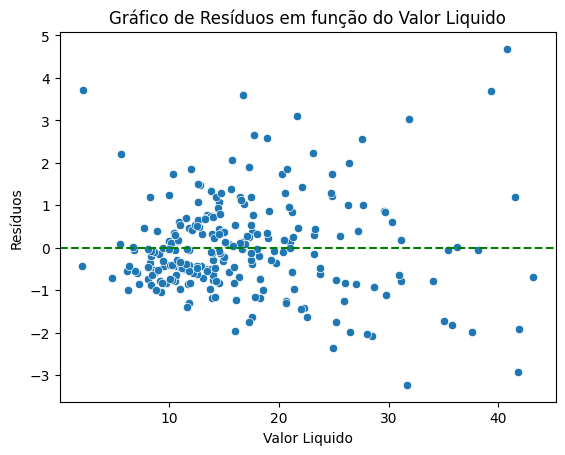

In [99]:
# Criando um gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'resid', data = tips)
plt.title('Gráfico de Resíduos em função do Valor Liquido')
plt.xlabel('Valor Liquido')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='g', linestyle='--')

In [100]:
# Criando novo modelo de regressão com o net_bill em logaritimo
reg_net_bill_log = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()
reg_net_bill_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           5.38e-19
Time:                        18:54:15   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Criando novo modelo de regressão com o net_bill em polinômio de segundo grau
reg_net_bill_pol = smf.ols('tip ~ smoker + np.power(net_bill, 2)', data = tips).fit()
reg_net_bill_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.04e-19
Time:                        18:54:15   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Em comparação com os dois modelos onde o net_bill está em logaritimo e em polinômio, o de polinômio ficou melhor, tanto por causa do R² ter um percentual maior quanto pelo valor do P, pois no summary do logaritimo o valor de smoker fica em 0,77 enquanto o valor de smoke no polinômio está em 0,27

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [102]:
# Criando a matriz de design com o patsy com o tip em logaritimo
y2, X2 = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

# Aplicando a matriz de design para o ols do Statsmodels
reg_patsy2 = smf.ols('y2 ~ X2', data = tips).fit()
reg_patsy2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.21e-18
Time:                        18:54:15   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2252      0.039      5.801      0.000       0.149       0.302
X2[0]          0.2252      0.039      5.801      0.000       0.149       0.302
X2[1]          0.0048      0.050      0.097      0.923      -0.094       0.104
X2[2]          0.0436      0.048      0.903      0.367      -0.052       0.139
X2[3]          0.0191      0.054      0.355      0.723      -0.087       0.125
X2[4]          0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                     9.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
# Novamente criando mais uma regressão sem o patsy por conta de não manter os nomes das variáveis
reg_tip_log = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data = tips).fit()
reg_tip_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.21e-18
Time:                        18:54:15   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Removendo as variáveis não relevantes sex e time, sex com 0.923 e time com 0.723 de T Value
reg_tip_log = smf.ols('np.log(tip) ~ smoker + net_bill', data = tips).fit()
reg_tip_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.31e-20
Time:                        18:54:15   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Declarando uma nova coluna para guardar os valores dos resíduos com o tip em logaritimo
tips['resid_tip_log'] = reg_tip_log.resid
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,resid,resid_tip_log
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.960186,-0.984295


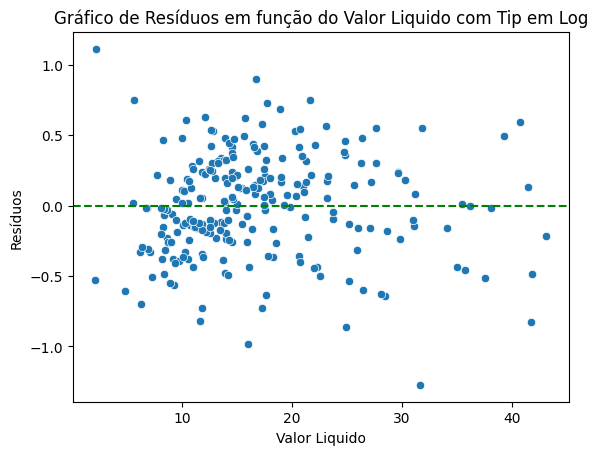

In [106]:
# Criando um gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'resid_tip_log', data = tips)
plt.title('Gráfico de Resíduos em função do Valor Liquido com Tip em Log')
plt.xlabel('Valor Liquido')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='g', linestyle='--')

In [107]:
# Criando nova regressão para testar com o tip e net_bill em logaritimo
reg_tip_net_log = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', data = tips).fit()
reg_tip_net_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           7.20e-21
Time:                        18:54:16   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Criando nova regressão para testar com tip em logaritimo e net_bill elevado a 2 potência
reg_tip_log_net_pot = smf.ols('np.log(tip) ~ smoker + np.power(net_bill, 2)', data = tips).fit()
reg_tip_log_net_pot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           5.45e-16
Time:                        18:54:16   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O modelo em que net_bill e tips estão em log tem um R² quase 7% melhor, porém a variável smoker ficou mais irrelevante , ficando com valor 0.75, por isso será tirado mais um summary sem o smoker para poder comparar também.

In [109]:
'''  Criando nova regressão com tip e net_bill em logaritimo, 
porém removendo o smoker devido seu aumento no T Value  '''

reg_tip_net_log = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()
reg_tip_net_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           5.62e-22
Time:                        18:54:16   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Levando em consideração o R², a regressão com tip e net_bill no logaritimo ficou melhor, porém foi removido muitas variáveis.

In [110]:
R2 = reg_tip_net_log.rsquared
R2

0.3191910159472313

Levando em consideração que as variáveis com baixa relevância foram removidas e que a regressão do segundo exercício onde foi aplicado logaritimo nas variáveis alvo e explicativa teve um R² maior, a regressão do segundo exercício acabou com um resultado levemente superior.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [111]:
# Carregando base de dados e atribuindo a variável df
df = pd.read_csv('previsao_de_renda.csv')
df.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [112]:
# Verificando os tipos das variáveis
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

## Reg Normal

In [113]:
# Declarando a variável reg_renda para guardar a regressão com renda=resposta e tempo_emprego=explicativa
reg_renda = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Verificando o quão linear é essa relação, além do resultado de R² de 0,15%.

In [114]:
'''# Gráfico de Dispersão
sns.scatterplot(x = df['tempo_emprego'], y = df['renda'], label = 'Valores de Renda')

# Adicionando a linha de regressão
sns.lineplot(x = df['tempo_emprego'], y = reg_renda.fittedvalues, color = 'red',
             label = 'Linha de Regressão')

# Embelezando o gráfico
plt.xlabel("Tempo de Emprego")
plt.ylabel("Renda")
plt.title("Gráfico de Dispersão com Linha de Regressão")
plt.legend()
plt.show()'''


'# Gráfico de Dispersão\nsns.scatterplot(x = df[\'tempo_emprego\'], y = df[\'renda\'], label = \'Valores de Renda\')\n\n# Adicionando a linha de regressão\nsns.lineplot(x = df[\'tempo_emprego\'], y = reg_renda.fittedvalues, color = \'red\',\n             label = \'Linha de Regressão\')\n\n# Embelezando o gráfico\nplt.xlabel("Tempo de Emprego")\nplt.ylabel("Renda")\nplt.title("Gráfico de Dispersão com Linha de Regressão")\nplt.legend()\nplt.show()'

2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?


In [115]:
# Guardando os resíduos na variável resid_renda
resid_renda = reg_renda.resid
resid_renda

0        -297.781680
1        3198.435291
2         719.596548
3        4250.394720
4       -2567.777305
            ...     
14995   -2040.554213
14996   -3557.488379
14997   -1679.598969
14998    3387.551297
14999   -2524.111369
Length: 12466, dtype: float64

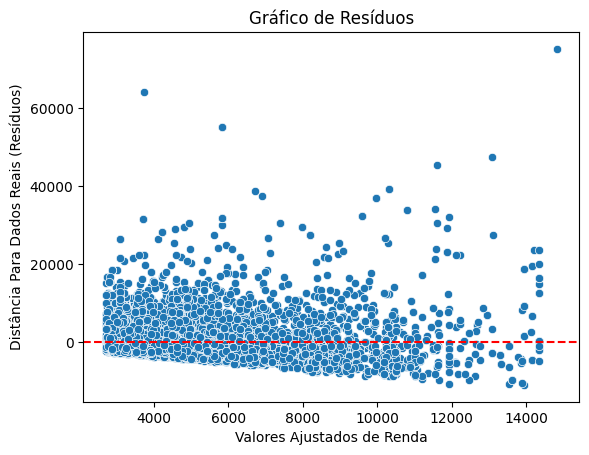

In [116]:

sns.scatterplot(x = reg_renda.fittedvalues, y = resid_renda)
plt.xlabel("Valores Ajustados de Renda")
plt.ylabel("Distância Para Dados Reais (Resíduos)")
plt.title("Gráfico de Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Já que os valores de renda estão muito discrepantes em alguns casos, será colocado esses valores na escala de log para tentar minimizar a diferença entre os valores.

## Reg Target com Log

In [117]:
# Declarando nova regressão com a renda em LOG.
reg_renda_log = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
reg_renda_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### De cara já deu pra ver que o R² piorou infelizmente, porém será analisado os resíduos e o gráfico para ver como ficaram.

In [118]:
# Obtendo resíduos do modelo
resid_renda_log = reg_renda_log.resid
resid_renda_log

0        0.154581
1        0.869365
2        0.471669
3        1.026643
4       -0.131542
           ...   
14995   -0.814802
14996   -0.517722
14997   -0.534928
14998    0.894820
14999   -1.042664
Length: 12466, dtype: float64

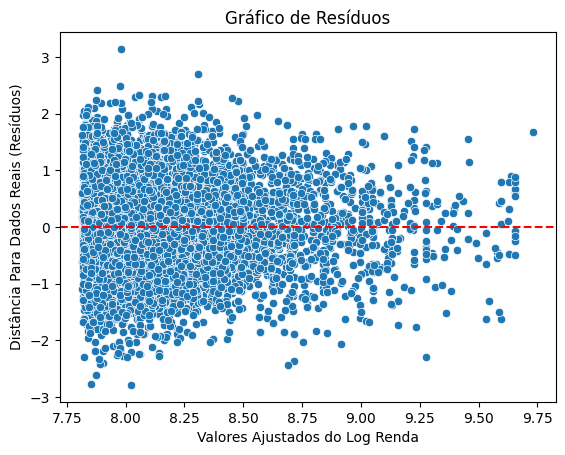

In [119]:
# Plot do Gráfico de Resíduos da Renda no Log
sns.scatterplot(x = reg_renda_log.fittedvalues, y = resid_renda_log)
plt.xlabel("Valores Ajustados do Log Renda")
plt.ylabel("Distância Para Dados Reais (Resíduos)")
plt.title("Gráfico de Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



In [120]:
'''# Gráfico de Dispersão no Log
sns.scatterplot(x = df['tempo_emprego'], y = np.log(df['renda']), label = 'Valores de Renda em Log')

# Adicionando a linha de regressão
sns.lineplot(x = df['tempo_emprego'], y = reg_renda_log.fittedvalues, color = 'red',
             label = 'Linha de Regressão')

# Embelezando o gráfico
plt.xlabel("Tempo de Emprego")
plt.ylabel("Renda em Log")
plt.title("Gráfico de Dispersão Log com Linha de Regressão")
plt.legend()
plt.show()'''


'# Gráfico de Dispersão no Log\nsns.scatterplot(x = df[\'tempo_emprego\'], y = np.log(df[\'renda\']), label = \'Valores de Renda em Log\')\n\n# Adicionando a linha de regressão\nsns.lineplot(x = df[\'tempo_emprego\'], y = reg_renda_log.fittedvalues, color = \'red\',\n             label = \'Linha de Regressão\')\n\n# Embelezando o gráfico\nplt.xlabel("Tempo de Emprego")\nplt.ylabel("Renda em Log")\nplt.title("Gráfico de Dispersão Log com Linha de Regressão")\nplt.legend()\nplt.show()'

#### Surpreendentemente, mesmo melhorando os outliers o R² ficou pior, então talvez os outliers possam ser tratados de uma maneira diferente. Pesquisei um pouco e vi que que a regressão robusta pode ajudar, colocando pesos diferentes a medida em que os dados se distanciam da média.

## Reg Robusto

In [121]:
# Verificando valores ausentes em tempo_emprego após obter erro na tentativa de usar a regressão robusta
print(df['tempo_emprego'].isnull().sum())

2534


In [122]:
'''   Como obtive valores faltantes e o foco dessa análise não é lhe dar com esse tipo de problema, 
então fiz preenchimento dos valores faltantes pela média dos valores.  '''

media_tempo_emprego = df['tempo_emprego'].mean() # Media dos valores
df_rob = df.copy() # Copia pra não alterar o original
df_rob['tempo_emprego'].fillna(media_tempo_emprego, inplace=True) # Preenchendo os valores faltantes com média

In [123]:
# Declarando uma regressão robusta com o uso do RLM do Statsmodels
reg_rob = sm.RLM(df_rob['renda'], df_rob['tempo_emprego']).fit()
reg_rob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  renda   No. Observations:                15000
Model:                            RLM   Df Residuals:                    14999
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 18 Jul 2023                                         
Time:                        18:54:16                                         
No. Iterations:                    11                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
tempo_emprego   416.4714      2.466    168.875      0.000     411.638     421.305
=================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

#### Para minha surpresa, a regressão robusta não calcula o R², aparentemente para alguns modos o R² pode não ser a medida mais relevante, mesmo assim, será calculado o R² para comparação.

In [124]:
# Obtendo as previsões do modelo
y_pred_rob = reg_rob.predict()

# Calculando a soma dos quadrados totais
ss_total = ((df['renda'] - df['renda'].mean()) ** 2).sum()

# Calculando a soma dos quadrados da regressão
ss_reg = ((y_pred_rob - df['renda'].mean()) ** 2).sum()

# Calculando o R²
r_squared_rob = ss_reg / ss_total
r_squared_rob

0.40038388957086646

#### Foi obtido um incrível R² de 40% porém como dito anteiormente, para esse tipo de modelo não será tão significativo esse valor

In [125]:
'''# Gráfico de Dispersão com regressão robusta
sns.scatterplot(x = df['tempo_emprego'], y = df['renda'], label = 'Valores de Renda em RegRobusto')

# Adicionando a linha de regressão
sns.lineplot(x = df['tempo_emprego'], y = reg_rob.fittedvalues, color = 'red',
             label = 'Linha de Regressão')

# Embelezando o gráfico
plt.xlabel("Tempo de Emprego")
plt.ylabel("Renda com RegRobusto")
plt.title("Gráfico de Dispersão Robusto com Linha de Regressão")
plt.legend()
plt.show()'''

'# Gráfico de Dispersão com regressão robusta\nsns.scatterplot(x = df[\'tempo_emprego\'], y = df[\'renda\'], label = \'Valores de Renda em RegRobusto\')\n\n# Adicionando a linha de regressão\nsns.lineplot(x = df[\'tempo_emprego\'], y = reg_rob.fittedvalues, color = \'red\',\n             label = \'Linha de Regressão\')\n\n# Embelezando o gráfico\nplt.xlabel("Tempo de Emprego")\nplt.ylabel("Renda com RegRobusto")\nplt.title("Gráfico de Dispersão Robusto com Linha de Regressão")\nplt.legend()\nplt.show()'

#### O gráfico ainda está muito similar com os anteriores, então será feito mais um teste para tratamento dos outliers.

#### Como ultima alternativa, será filtrado alguns outliers e feito uma análise sem o uso desses dados. Sei que deixar dados de fora de uma análise é algo delicado, porém é uma visão que não pode ser descartada, visto que o ideal é buscar uma regressão mais generalizada possível e os outliers podem fazer a reta a ter uma tendencia fora da maioria dos dados.

## Reg Filtrado

#### Será feito ajustes para obter o ponto ótimo de corte dos outliers com base no R²

In [126]:
# Verificando valor máximo de renda
limite_superior = df['renda'].max()
limite_superior

89918.04

In [127]:
'''   Define o espaçamento dos dados, é a quantidade que eu 
tenho dividido pelo num_pontos, para não precisar pegar um por um.   '''
num_pontos = 3000
'''  O linspace cria uma lista de x numéros, onde x=num_pontos de 
 500(valor minimo que estabeleci) até o valor máximo do meu conjunto, que no caso é 89918  '''
limites_avaliados = np.linspace(500, limite_superior, num_pontos)

In [128]:
# Verificando a quantidade de dados para analisar o impacto do num_pontos
qnt_dados = df.shape[0]
qnt_dados

15000

In [129]:
# Função para calcular o R² com base no ponto a ser passado
def calcular_r2(limite):
    df_filtrado = df[df['renda'] <= limite]
    reg_filtrado = smf.ols('renda ~ tempo_emprego', data=df_filtrado).fit()
    return reg_filtrado.rsquared

# Variável que vai guardar o melhor valor de R²
r2_otimo = 0.0
# Variável que vai guardar o melhor valor de limite da renda
limite_otimo = 0

''' O limite vão ser os valores criados anteriormente no limites_avaliados, para cada iteração
o R² vai ter um novo valor, esse valor é calculado na função calcular_r2 que faz um novo
DF que filtra os valores que estão acima do estabelecido, esse valor estabelecido é alterado
num_pontos vezes e cada iteração se guarda o melhor r² e o valor de corte.'''
for limite in limites_avaliados:
    r2 = calcular_r2(limite)
    if r2 > r2_otimo:
        r2_otimo = r2
        limite_otimo = limite

print("Melhor Limite Superior:", limite_otimo)
print("Melhor R²:", r2_otimo)

Melhor Limite Superior: 60489.69539179726
Melhor R²: 0.15923137663430864


In [151]:
# Criando o df_filtrado finalmente com o corte de outliers no ponto ótimo
df_filtrado = df[df['renda'] <= limite_otimo]

#### Então ao dividir os valores em num_pontos e remover os outliers no limite ótimo, foi obtido um R² melhor do que antes.

In [149]:
# Criando regressão com o data frame filtrado
reg_filtrado = smf.ols('renda ~ tempo_emprego', data = df_filtrado).fit()
reg_filtrado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2360.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:56:57   Log-Likelihood:            -1.2204e+05
No. Observations:               12462   AIC:                         2.441e+05
Df Residuals:                   12460   BIC:                         2.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2671.4712     59.000     45.279      0.000    2555.822    2787.120
tempo_emprego   278.5051      5.733     48.577      0.000     267.267     289.743
==============================================================================
Omnibus:                     8249.902   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141093.541
Skew:                           2.955   Prob(JB):                         0.00
Kurtosis:                      18.389   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

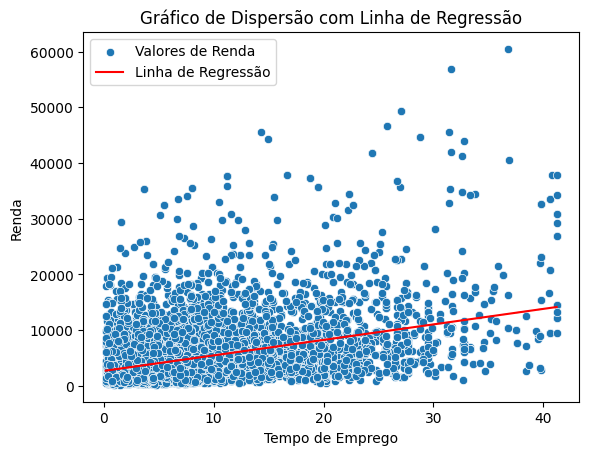

In [132]:
# Gráfico de Dispersão Usando DF Filtrado
sns.scatterplot(x = df_filtrado['tempo_emprego'], y = df_filtrado['renda'], label = 'Valores de Renda')

# Adicionando a linha de regressão
sns.lineplot(x = df_filtrado['tempo_emprego'], y = reg_filtrado.fittedvalues, color = 'red',
             label = 'Linha de Regressão')

# Embelezando o gráfico
plt.xlabel("Tempo de Emprego")
plt.ylabel("Renda")
plt.title("Gráfico de Dispersão com Linha de Regressão")
plt.legend()
plt.show()


#### Última análise com o DataFrame filtrado e renda no log, mas R² piorou bastante.

In [150]:
# Regressão do DF Filtrado e renda no LOG
reg_filtrado_log = smf.ols('np.log(renda) ~ tempo_emprego', data = df_filtrado).fit()
reg_filtrado_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2090.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:57:11   Log-Likelihood:                -13932.
No. Observations:               12462   AIC:                         2.787e+04
Df Residuals:                   12460   BIC:                         2.788e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8075      0.010    775.064      0.000       7.788       7.827
tempo_emprego     0.0448      0.001     45.719      0.000       0.043       0.047
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.018
Skew:                           0.022   Prob(JB):                        0.601
Kurtosis:                       3.003   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.


In [134]:
# Visualizando os dados
df_filtrado.head(1)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24


In [135]:
# Verificando as demais variáveis
df_filtrado.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [136]:
reg_filtrado_completo = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + \
                            tipo_renda + educacao + estado_civil + tipo_residencia + idade + \
                            tempo_emprego + qt_pessoas_residencia', data = df_filtrado).fit()

reg_filtrado_completo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     150.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:55:55   Log-Likelihood:            -1.2153e+05
No. Observations:               12462   AIC:                         2.431e+05
Df Residuals:                   12437   BIC:                         2.433e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -151.9706   1620.090     -0.094      0.925   -3327.598    3023.657
sexo[T.M]                         2317.0188     85.250     27.179      0.000    2149.917    2484.121
posse_de_veiculo[T.True]           -51.1117     81.960     -0.624      0.533    -211.766     109.543
posse_de_imovel[T.True]            343.2406     80.711      4.253      0.000     185.035     501.446
tipo_renda[T.Bolsista]            -786.5208   2084.894     -0.377      0.706   -4873.236    3300.195
tipo_renda[T.Empresário]           939.9723     87.242     10.774      0.000     768.965    1110.980
tipo_renda[T.Pensionista]         1719.7459   1390.333      1.237      0.216   -1005.521    4445.013
tipo_renda[T.Servidor público]     449.0072    126.248      3.557      0.000     201.541     696.473
educacao[T.Pós graduação]         2216.1751   1045.735      2.119      0.034     166.372    4265.978
educacao[T.Secundário]            -243.1135    423.481     -0.574      0.566   -1073.201     586.974
educacao[T.Superior completo]      330.8414    425.259      0.778      0.437    -502.732    1164.415
educacao[T.Superior incompleto]   -283.8361    455.587     -0.623      0.533   -1176.857     609.185
estado_civil[T.Separado]           149.3062    779.931      0.191      0.848   -1379.478    1678.091
estado_civil[T.Solteiro]           383.7121    765.598      0.501      0.616   -1116.979    1884.403
estado_civil[T.União]              -13.7196    139.060     -0.099      0.921    -286.298     258.859
estado_civil[T.Viúvo]              -46.7187    800.921     -0.058      0.953   -1616.648    1523.210
tipo_residencia[T.Casa]           -370.4280    317.883     -1.165      0.244    -993.529     252.673
tipo_residencia[T.Com os pais]    -653.1293    356.448     -1.832      0.067   -1351.823      45.564
tipo_residencia[T.Comunitário]    -587.4419    613.340     -0.958      0.338   -1789.683     614.799
tipo_residencia[T.Estúdio]        -951.3397    529.468     -1.797      0.072   -1989.178      86.499
tipo_residencia[T.Governamental]  -881.3112    384.292     -2.293      0.022   -1634.582    -128.040
qtd_filhos                        -209.7152    763.611     -0.275      0.784   -1706.510    1287.080
idade                               29.5891      4.652      6.361      0.000      20.471      38.707
tempo_emprego                      293.8374      5.945     49.422      0.000     282.183     305.491
qt_pessoas_residencia              281.5016    762.156      0.369      0.712   -1212.443    1775.446
==============================================================================
Omnibus:                     8335.195   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158345.173
Skew:             

4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros


In [161]:
# Criando um novo DF para guardar as variáveis significantes
df_filtrado_relevante = df_filtrado[['renda', 'sexo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'tipo_residencia',
                                   'idade', 'tempo_emprego']]
df_filtrado_relevante.head(1)

,renda,sexo,posse_de_imovel,tipo_renda,educacao,tipo_residencia,idade,tempo_emprego
0,3369.24,F,True,Assalariado,Secundário,Casa,36,3.575342


In [155]:
# Criando regressão para verificar o resultado antes de tirar as linhas não relevantes
reg_filtrado_completo_relevante = smf.ols('renda ~ sexo + posse_de_imovel + tipo_renda + educacao + \
                                tipo_residencia + idade + tempo_emprego', data = df_filtrado_relevante).fit()

reg_filtrado_completo_relevante.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     212.5
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:58:39   Log-Likelihood:            -1.2154e+05
No. Observations:               12462   AIC:                         2.431e+05
Df Residuals:                   12444   BIC:                         2.432e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          531.5410    549.413      0.967      0.333    -545.394    1608.476
sexo[T.M]                         2316.6157     79.580     29.111      0.000    2160.627    2472.605
posse_de_imovel[T.True]            349.8179     80.511      4.345      0.000     192.004     507.631
tipo_renda[T.Bolsista]            -764.4815   2084.301     -0.367      0.714   -4850.033    3321.070
tipo_renda[T.Empresário]           940.3810     87.020     10.806      0.000     769.808    1110.954
tipo_renda[T.Pensionista]         1727.7674   1389.775      1.243      0.214    -996.406    4451.941
tipo_renda[T.Servidor público]     454.5626    126.122      3.604      0.000     207.344     701.781
educacao[T.Pós graduação]         2268.1416   1044.539      2.171      0.030     220.683    4315.600
educacao[T.Secundário]            -224.9654    423.005     -0.532      0.595   -1054.120     604.189
educacao[T.Superior completo]      342.1905    424.497      0.806      0.420    -489.889    1174.270
educacao[T.Superior incompleto]   -267.2188    455.037     -0.587      0.557   -1159.162     624.725
tipo_residencia[T.Casa]           -374.6895    317.470     -1.180      0.238    -996.980     247.601
tipo_residencia[T.Com os pais]    -662.7544    356.171     -1.861      0.063   -1360.905      35.396
tipo_residencia[T.Comunitário]    -621.6866    612.976     -1.014      0.311   -1823.214     579.841
tipo_residencia[T.Estúdio]        -941.6804    528.878     -1.781      0.075   -1978.364      95.003
tipo_residencia[T.Governamental]  -879.3834    384.039     -2.290      0.022   -1632.158    -126.609
idade                               26.3734      4.364      6.043      0.000      17.819      34.928
tempo_emprego                      294.5655      5.933     49.647      0.000     282.936     306.195
==============================================================================
Omnibus:                     8329.852   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157959.638
Skew:                           2.954   Prob(JB):                         0.00
Kurtosis:                      19.410   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Algumas linhas ficaram com o valor de p value ruim, então será removido essas linhas em especifico

In [156]:
# Verificando os valores únicos de cada coluna
uni_renda = df_filtrado_relevante['tipo_renda'].unique()
uni_educacao = df_filtrado_relevante['educacao'].unique()
uni_residencia = df_filtrado_relevante['tipo_residencia'].unique()

print(uni_renda)
print(uni_educacao)
print(uni_residencia)

['Assalariado' 'Empresário' 'Servidor público' 'Pensionista' 'Bolsista']
['Secundário' 'Superior completo' 'Superior incompleto' 'Primário'
 'Pós graduação']
['Casa' 'Com os pais' 'Aluguel' 'Governamental' 'Estúdio' 'Comunitário']


In [157]:
# Guardando os valores a serem removidos por ter um p value acima de 5%
tipo_renda_irrelevantes = ['Bolsista', 'Pensionista']
educacao_irrelevantes = ['Secundário', 'Superior completo', 'Superior incompleto']
tipo_residencia_irrelevantes = ['Casa', 'Comunitário', 'Com os pais', 'Estúdio']

In [162]:
''' Removendo os valores do DF com base nas variáveis criadas anteriormente,
o sinal de "~" está deixando o isin como false, ao contrário, então o df é tudo menos o 
que está dentro de isin'''
df_filtrado_relevante2  = df_filtrado_relevante [
    ~df_filtrado_relevante ['tipo_renda'].isin(tipo_renda_irrelevantes) &
    ~df_filtrado_relevante ['educacao'].isin(educacao_irrelevantes) &
    ~df_filtrado_relevante ['tipo_residencia'].isin(tipo_residencia_irrelevantes)
]

In [165]:
# Verificando os valores únicos de cada coluna após a remoção
uni_renda = df_filtrado_relevante2['tipo_renda'].unique()
uni_educacao = df_filtrado_relevante2['educacao'].unique()
uni_residencia = df_filtrado_relevante2['tipo_residencia'].unique()

print(uni_renda)
print(uni_educacao)
print(uni_residencia)

['Empresário' 'Assalariado']
['Primário']
['Governamental' 'Aluguel']


#### Na nova regressão o R² disparou para 84%, porém a residencia governamental e idade ficaram com p value acima nessa nova relação.

In [167]:
reg_filtrado_completo_relevante = smf.ols('renda ~ sexo + posse_de_imovel + tipo_renda + educacao + \
                                tipo_residencia + idade + tempo_emprego', data = df_filtrado_relevante2).fit()

reg_filtrado_completo_relevante.summary()

C:\Users\Bill_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 18 Jul 2023   Prob (F-statistic):            0.00726
Time:                        19:04:26   Log-Likelihood:                -85.638
No. Observations:                  10   AIC:                             179.3
Df Residuals:                       6   BIC:                             180.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          920.3446    221.387      4.157      0.006     378.629    1462.060
sexo[T.M]                        -5249.2459   2002.064     -2.622      0.039   -1.01e+04    -350.371
posse_de_imovel[T.True]           3814.3036   1014.433      3.760      0.009    1332.075    6296.533
tipo_renda[T.Empresário]         -2088.3360    687.325     -3.038      0.023   -3770.159    -406.513
tipo_residencia[T.Governamental]   114.7217    418.862      0.274      0.793    -910.197    1139.640
idade                               21.1355     17.609      1.200      0.275     -21.953      64.224
tempo_emprego                     2295.7254    434.148      5.288      0.002    1233.402    3358.048
==============================================================================
Omnibus:                        1.251   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.809
Skew:                           0.363   Prob(JB):                        0.667
Kurtosis:                       1.811   Cond. No.                     7.48e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.82e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Nessa nova regressão o tipo_renda Empresário fica com uma relação de 6%

In [144]:
reg_filtrado_completo_relevante = smf.ols('renda ~ sexo + \
        posse_de_imovel + tipo_renda + tempo_emprego', data = df_filtrado_relevante2).fit()

reg_filtrado_completo_relevante.summary()

C:\Users\Bill_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 18 Jul 2023   Prob (F-statistic):            0.00726
Time:                        18:55:55   Log-Likelihood:                -85.638
No. Observations:                  10   AIC:                             179.3
Df Residuals:                       6   BIC:                             180.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1829.7064    794.824      2.302      0.061    -115.159    3774.571
sexo[T.M]                -5212.8348   2048.980     -2.544      0.044   -1.02e+04    -199.162
posse_de_imovel[T.True]   3994.0807   1054.789      3.787      0.009    1413.106    6575.055
tipo_renda[T.Empresário] -1664.5728    731.747     -2.275      0.063   -3455.094     125.948
tempo_emprego             2107.1347    572.317      3.682      0.010     706.725    3507.545
==============================================================================
Omnibus:                        1.251   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.809
Skew:                           0.363   Prob(JB):                        0.667
Kurtosis:                       1.811   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Dessa forma, foi obtido a regressão final com todos P Values abaixo de 5% e R² 84%

In [145]:
reg_filtrado_completo_relevante = smf.ols('renda ~ sexo + \
        posse_de_imovel + tempo_emprego', data = df_filtrado_relevante2).fit()

reg_filtrado_completo_relevante.summary()

C:\Users\Bill_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 18 Jul 2023   Prob (F-statistic):            0.00726
Time:                        18:55:55   Log-Likelihood:                -85.638
No. Observations:                  10   AIC:                             179.3
Df Residuals:                       6   BIC:                             180.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 507.2299    900.478      0.563      0.594   -1696.161    2710.621
sexo[T.M]               -4805.5772   1968.592     -2.441      0.050   -9622.549      11.394
posse_de_imovel[T.True]  6110.3393   1895.749      3.223      0.018    1471.608    1.07e+04
tempo_emprego            1566.5928    594.128      2.637      0.039     112.815    3020.371
==============================================================================
Omnibus:                        1.251   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.809
Skew:                           0.363   Prob(JB):                        0.667
Kurtosis:                       1.811   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [146]:
residuo_final = reg_filtrado_completo_relevante.resid
residuo_final

3616    -6.884600e+02
5985     1.603757e+03
6826    -6.884600e+02
7068    -1.817763e+03
7967    -1.389753e+03
9948     2.065380e+03
10272   -3.637979e-12
10580   -6.884600e+02
12446   -1.818989e-12
13734    1.603757e+03
dtype: float64

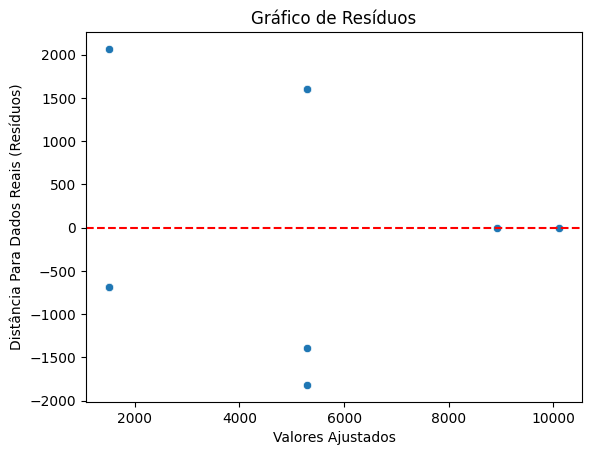

In [168]:
# Plot do Gráfico de Resíduos da Renda
sns.scatterplot(x = reg_filtrado_completo_relevante.fittedvalues, y = residuo_final)
plt.xlabel("Valores Ajustados")
plt.ylabel("Distância Para Dados Reais (Resíduos)")
plt.title("Gráfico de Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



#### De acordo com o R² e o p value, a regressão é muito bem explicada, com R²=84% e todos p values < 5%, porém esse passo a passo custou todos dados que servem para explicar a renda e não seria confiável se basear nessa quantidade de volume de dados. Sendo assim teria que se re-avaliar os parâmetros, por exemplo o valor do p value, para que seja avaliado um número maior de amostras.

In [174]:
# Verificando o número de linhas antes do filtro do pvalue
total_dados = df_filtrado_relevante.shape[0]
total_dados

14996

In [176]:
# Contar a quantidade de ocorrências dos valores irrelevantes em cada coluna
quantidade_tipo_renda_irrelevantes = df_filtrado_relevante['tipo_renda'].isin(tipo_renda_irrelevantes).sum()
quantidade_educacao_irrelevantes = df_filtrado_relevante['educacao'].isin(educacao_irrelevantes).sum()
quantidade_tipo_residencia_irrelevantes = df_filtrado_relevante['tipo_residencia'].isin(tipo_residencia_irrelevantes).sum()

In [178]:
# Usando a quantidade total para dividir e tirar a porcentagem e ter uma noção melhor
porcentagem_tipo_renda_irrelevantes = (quantidade_tipo_renda_irrelevantes / total_dados) * 100
porcentagem_educacao_irrelevantes = (quantidade_educacao_irrelevantes / total_dados) * 100
porcentagem_tipo_residencia_irrelevantes = (quantidade_tipo_residencia_irrelevantes / total_dados) * 100

print("Porcentagem de tipo_renda_irrelevantes:", porcentagem_tipo_renda_irrelevantes, "%")
print("Porcentagem de educacao_irrelevantes:", porcentagem_educacao_irrelevantes, "%")
print("Porcentagem de tipo_residencia_irrelevantes:", porcentagem_tipo_residencia_irrelevantes, "%")

Porcentagem de tipo_renda_irrelevantes: 16.984529207788743 %
Porcentagem de educacao_irrelevantes: 98.58628967724727 %
Porcentagem de tipo_residencia_irrelevantes: 95.8188850360096 %


# Aqui fica claro que a quantidade que foi removida devido ao pvalue foi muito grande.